# Frame Classification using ResNet + LSTM with data augmentation

This notebook creates and trains an LSTM based classifier with a dataset, where data augmentation was applied, build arround feature vectors of dimension 512.

In [1]:
from utils2 import *
import os

%load_ext autoreload
%autoreload 2

## Train models

We will use the best configuration we found with our wandb project

In [6]:
best_config = {
    'abs_path': '../', # project path 
    'sequence_length': 300, 
    'backbone': 'resnet',
    'layers': 'lstm',
    'dropout_rate': 0.5,
    'num_layers': 1,
    'num_units': 128,
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': 32,
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
    'norm' : False,
    'num_heads' : 1,
    'model_name' : 'lstm512_aumented'
}

## Final model Training & Evaluation

(709, 300, 512) (709, 300, 2)
(122, 300, 512) (122, 300, 2)
Running experiment for Grooming
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5592 - fn: 5834.0000 - fp: 49089.3477 - loss: 0.7531 - prc: 0.1370 - precision: 0.1045 - recall: 0.4513 - tn: 53101.2188 - tp: 6823.2607
Epoch 1: val_loss improved from inf to 0.52949, saving model to lstm512_aumented_grooming.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.5609 - fn: 6063.2500 - fp: 50114.6250 - loss: 0.7510 - prc: 0.1374 - precision: 0.1056 - recall: 0.4530 - tn: 55752.1250 - tp: 6995.0000 - val_accuracy: 0.9248 - val_fn: 1913.0000 - val_fp: 839.0000 - val_loss: 0.5295 - val_prc: 0.6192 - val_precision: 0.6613 - val_recall: 0.4613 - val_tn: 32210.0000 - val_tp: 1638.0000
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 919ms/step - accuracy: 0.7453 - fn: 2998.9131 - fp: 28516.2617 - loss: 0.5862 - prc: 0.3452 - precision: 0.2645 - recall: 0.7054 - tn: 74238.8281 - tp: 9093.8262
Epoch 2: val_loss improved from 0.

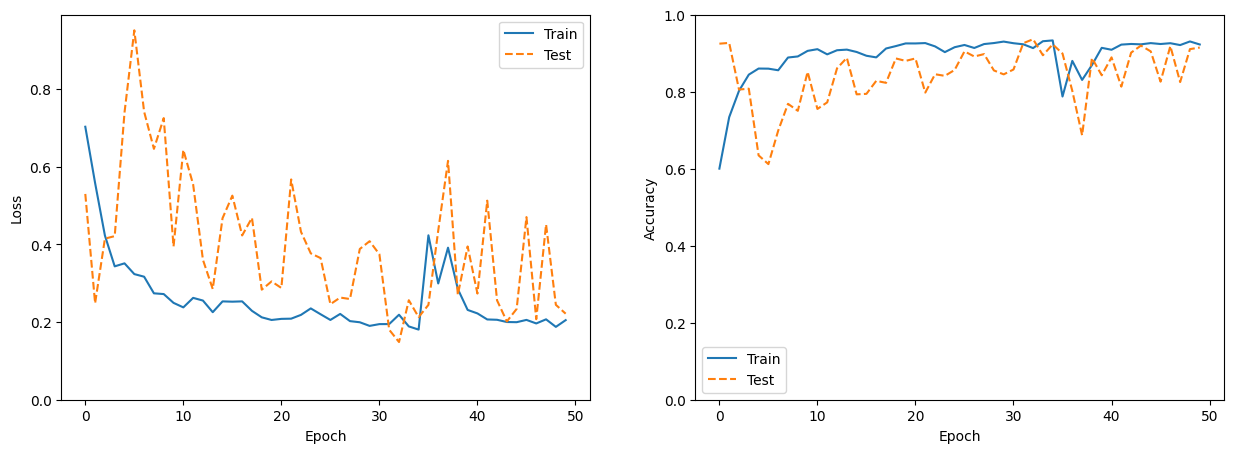

23/23 ━━━━━━━━━━━━━━━━━━━━ 29s 775ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step


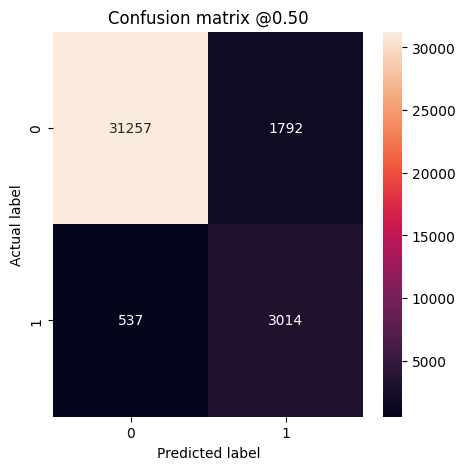

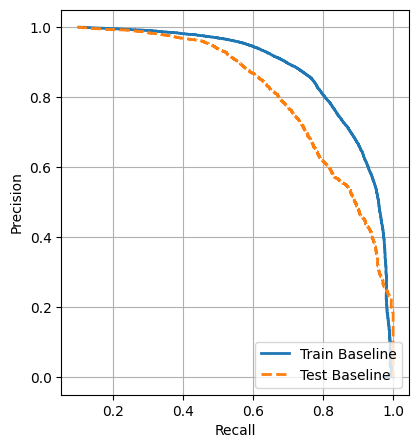

/Users/saraalbarran/Documents/SARA/ratolins/AutomatedMouseBehaviorRecognition/notebooks/utils2.py:385: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics = pd.concat([


Running experiment for Rearing
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5223 - fn: 11482.1309 - fp: 40745.6523 - loss: 0.7016 - prc: 0.2582 - precision: 0.2505 - recall: 0.5521 - tn: 48138.8242 - tp: 14481.2178
Epoch 1: val_loss improved from inf to 0.59571, saving model to lstm512_aumented_rearing.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 176s 6s/step - accuracy: 0.5247 - fn: 11826.1670 - fp: 41955.3320 - loss: 0.7007 - prc: 0.2593 - precision: 0.2520 - recall: 0.5536 - tn: 50096.3750 - tp: 15047.1250 - val_accuracy: 0.7106 - val_fn: 1668.0000 - val_fp: 8925.0000 - val_loss: 0.5957 - val_prc: 0.3179 - val_precision: 0.1852 - val_recall: 0.5488 - val_tn: 23978.0000 - val_tp: 2029.0000
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6731 - fn: 8634.9561 - fp: 28529.3906 - loss: 0.6051 - prc: 0.4867 - precision: 0.3623 - recall: 0.6516 - tn: 61276.2188 - tp: 16407.2617   
Epoch 2: val_loss improved from 0.59571 to 0.46139, saving model to lstm512_aumented_rear

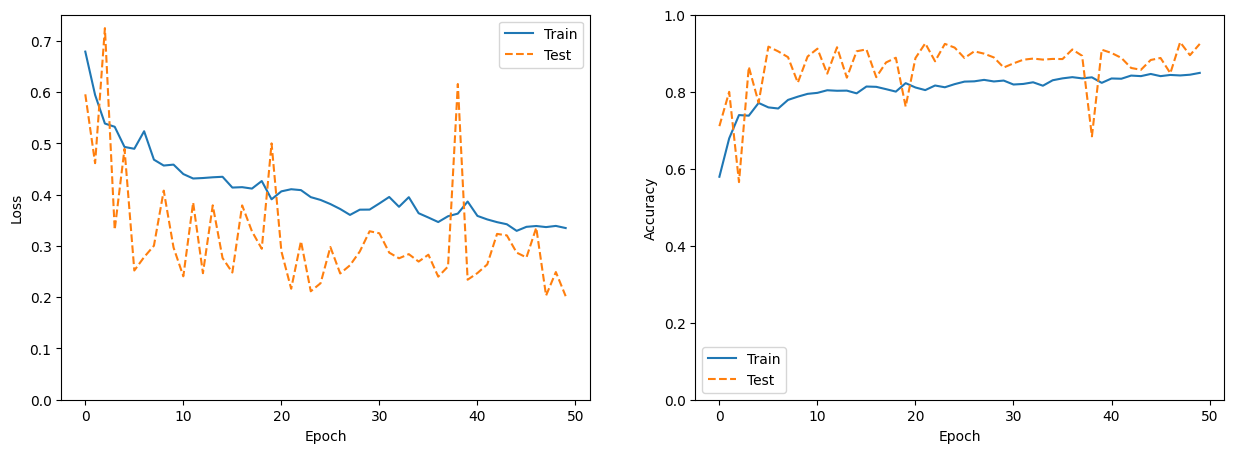

23/23 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step


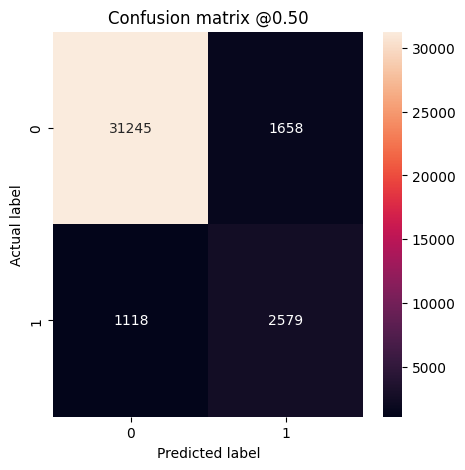

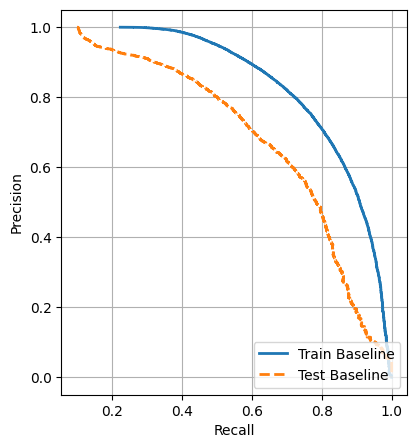

In [7]:
metrics = train_test_model(best_config)

## Evaluate model

On the following section we will evaluate the model on the validation set. 

In [8]:
from evaluation_utils import *
import keras

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Load validation data
path = '../data/processed/Dataset/'
val_data = load_dataset(path, 'resnet')
print('Validation videos: ', val_data.keys())

# Per each video, generate sequences
val_seq = {}
for i in list(val_data.keys()):
    X, Y = generate_sequences(val_data[i], 300)
    val_seq[i] = [X, Y]

behaviours = ['Grooming', 'Rearing']

# We will load the models
if 'Grooming' in behaviours:
    model_grooming = keras.models.load_model('lstm512_aumented_grooming.keras', compile=True)
if 'Rearing' in behaviours:
    model_rearing = keras.models.load_model('lstm512_aumented_rearing.keras', compile=True)

# Initialzie dataframes to save metrics
df_g = pd.DataFrame(columns=['Accuracy','Precision','Recall','PRC'], index=list(val_data.keys()))
df_r = pd.DataFrame(columns=['Accuracy','Precision','Recall','PRC'], index=list(val_data.keys()))

Validation videos:  dict_keys(['1', 'Animal62418', 'HD_ChR2_480A'])


In [18]:
df_g

,Accuracy,Precision,Recall,PRC
1,0.983333,0.912281,0.464286,0.889284
Animal62418,0.971111,0.913462,0.536723,0.69497
HD_ChR2_480A,0.956956,0.881736,0.907781,0.959787


In [19]:
df_r

,Accuracy,Precision,Recall,PRC
1,0.986154,0.602041,0.797297,0.82959
Animal62418,0.858254,0.518193,0.868559,0.784566
HD_ChR2_480A,0.884783,0.647394,0.687122,0.76175


### Results video 1.mp4

In [12]:
X, Y = val_seq['1']

# Add metrics to DataFrame
df_g.loc['1'] = model_grooming.evaluate(X,Y[:,:,0])[-4:]
df_r.loc['1'] = model_rearing.evaluate(X,Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 0.9833 - fn: 60.0000 - fp: 5.0000 - loss: 0.0353 - prc: 0.8893 - precision: 0.9123 - recall: 0.4643 - tn: 3783.0000 - tp: 52.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step - accuracy: 0.9862 - fn: 15.0000 - fp: 39.0000 - loss: 0.0567 - prc: 0.8296 - precision: 0.6020 - recall: 0.7973 - tn: 3787.0000 - tp: 59.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step


We will start by plotting the labels and actual predictions along the video frames.


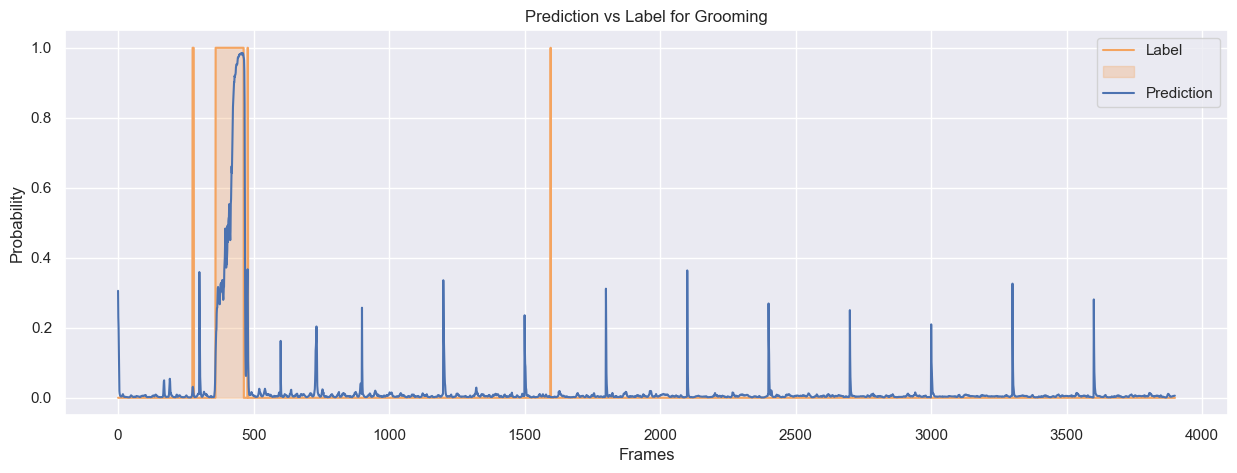

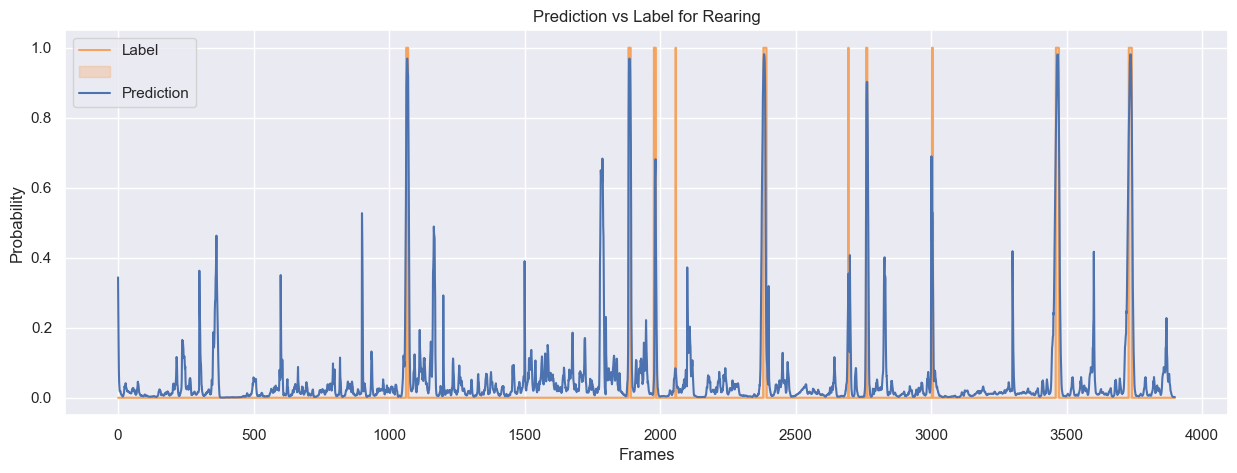

We will compute the PRC curve to choose the best threshold.


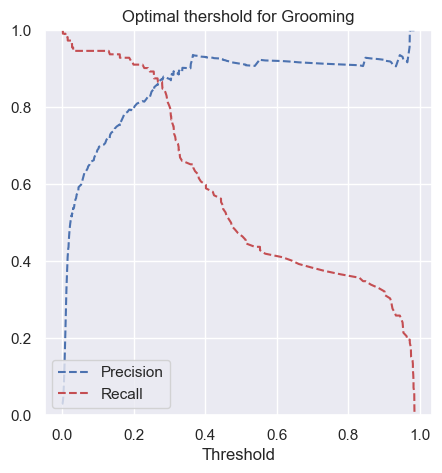

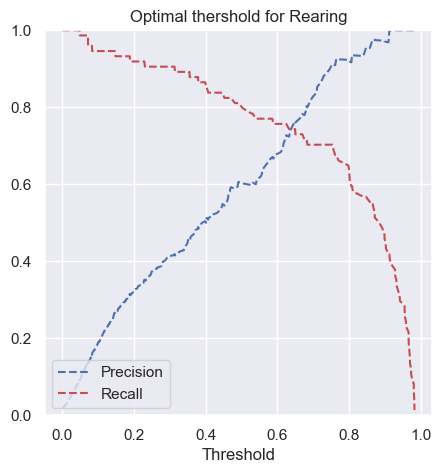

Lastly we will plot the confussion matrix for each behaviour


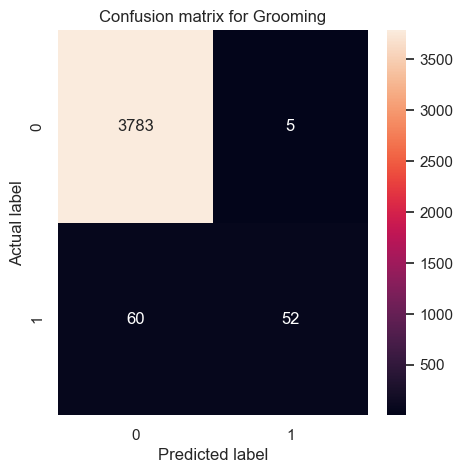

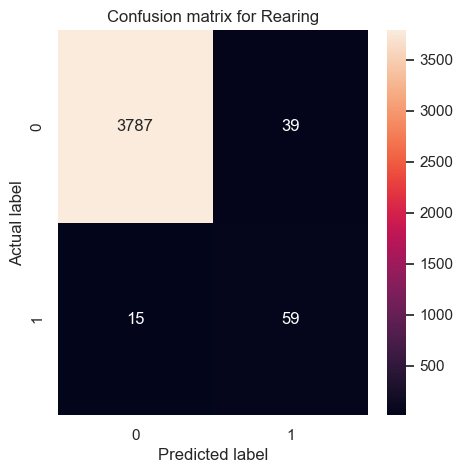

In [13]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)

### Results video Animal62418.mp4

In [14]:
X, Y = val_seq['Animal62418']

# Add metrics to DataFrame
df_g.loc['Animal62418'] = model_grooming.evaluate(X,Y[:,:,0])[-4:]
df_r.loc['Animal62418'] = model_rearing.evaluate(X,Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.9711 - fn: 164.0000 - fp: 18.0000 - loss: 0.1191 - prc: 0.6950 - precision: 0.9135 - recall: 0.5367 - tn: 5928.0000 - tp: 190.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.8583 - fn: 125.0000 - fp: 768.0000 - loss: 0.3093 - prc: 0.7846 - precision: 0.5182 - recall: 0.8686 - tn: 4581.0000 - tp: 826.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step


We will start by plotting the labels and actual predictions along the video frames.


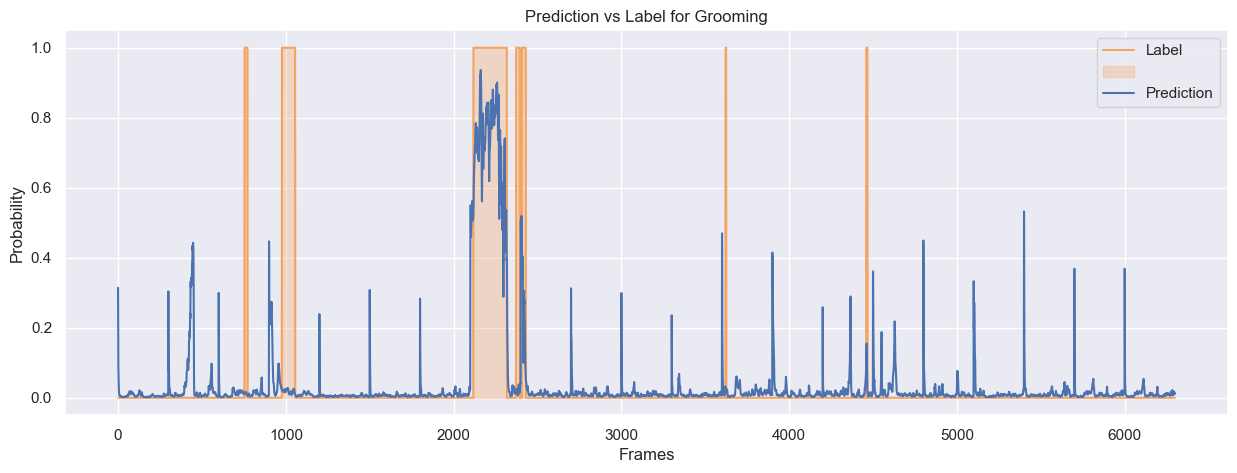

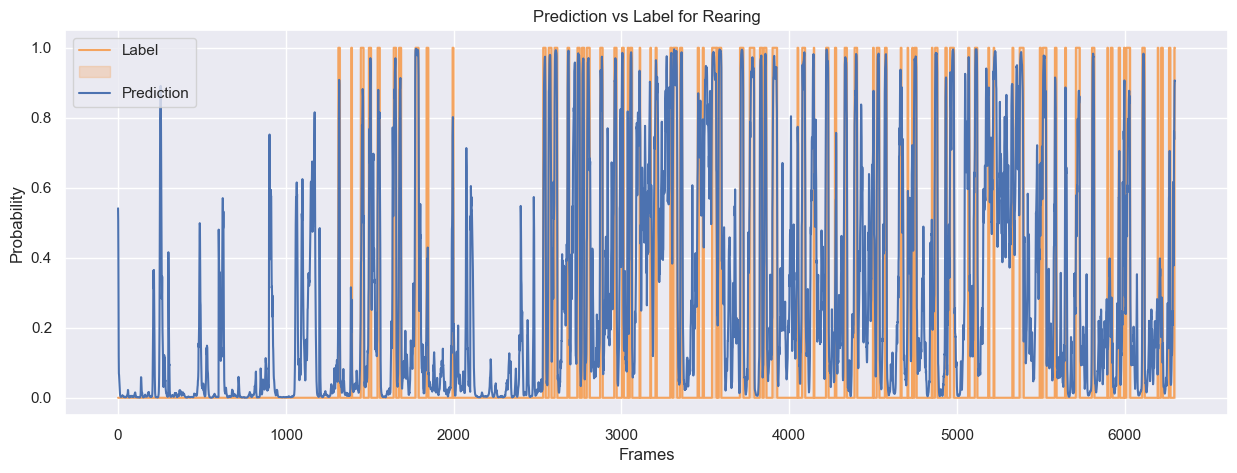

We will compute the PRC curve to choose the best threshold.


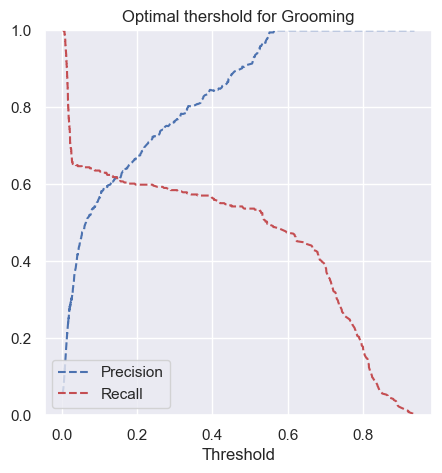

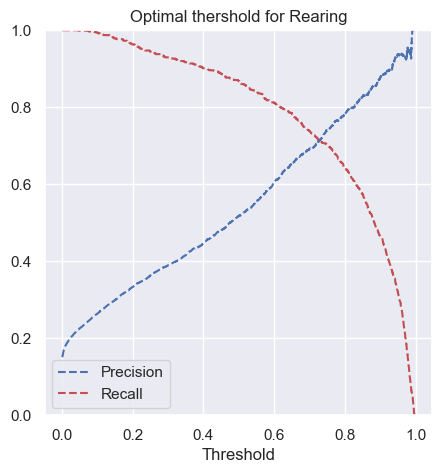

Lastly we will plot the confussion matrix for each behaviour


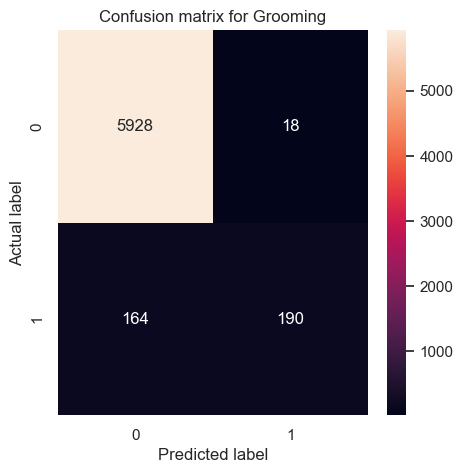

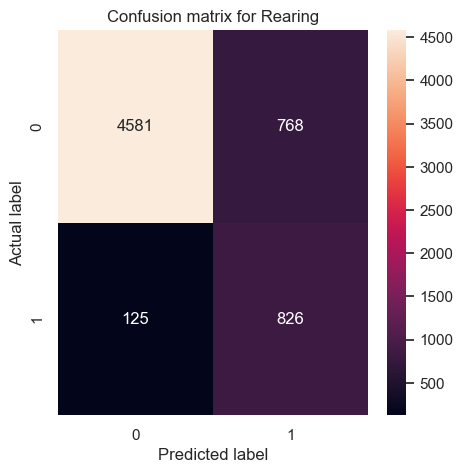

In [15]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)

### Results video HD_ChR2_480A.mp4

In [16]:
X, Y = val_seq['HD_ChR2_480A']

# Add metrics to DataFrame
df_g.loc['HD_ChR2_480A'] = model_grooming.evaluate(X,Y[:,:,0])[-4:]
df_r.loc['HD_ChR2_480A'] = model_rearing.evaluate(X,Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.9570 - fn: 128.0000 - fp: 169.0000 - loss: 0.1223 - prc: 0.9598 - precision: 0.8817 - recall: 0.9078 - tn: 5343.0000 - tp: 1260.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.8848 - fn: 362.0000 - fp: 433.0000 - loss: 0.2627 - prc: 0.7618 - precision: 0.6474 - recall: 0.6871 - tn: 5310.0000 - tp: 795.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step


We will start by plotting the labels and actual predictions along the video frames.


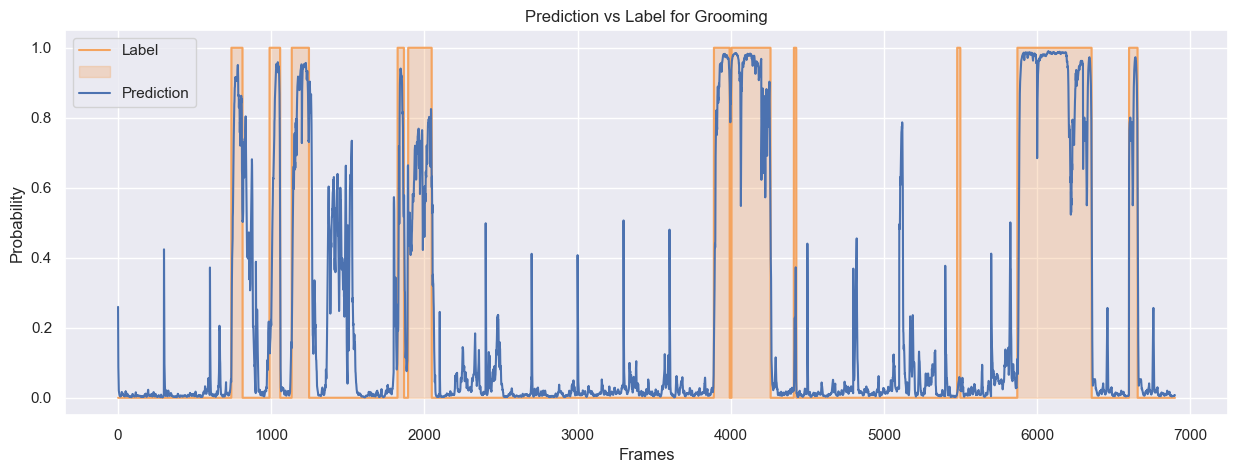

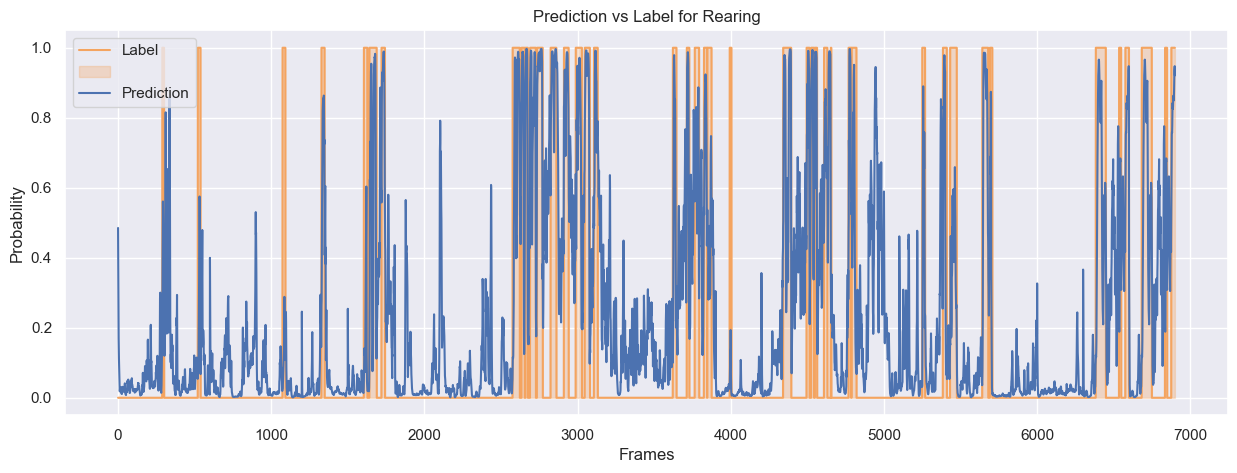

We will compute the PRC curve to choose the best threshold.


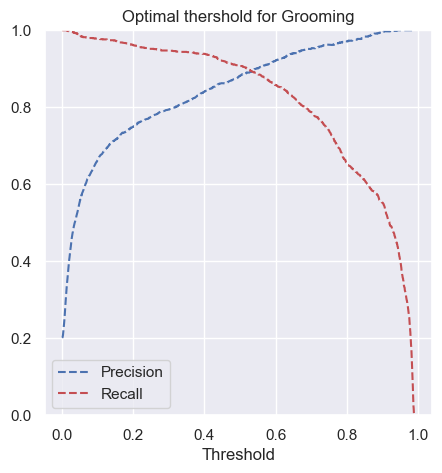

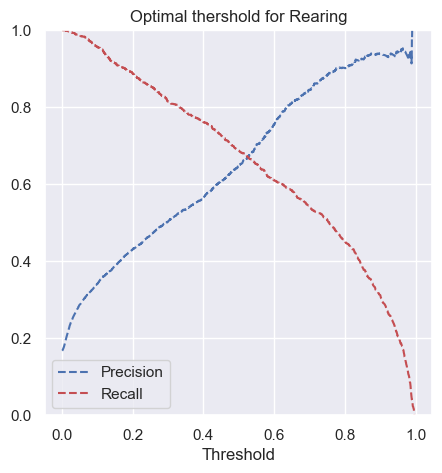

Lastly we will plot the confussion matrix for each behaviour


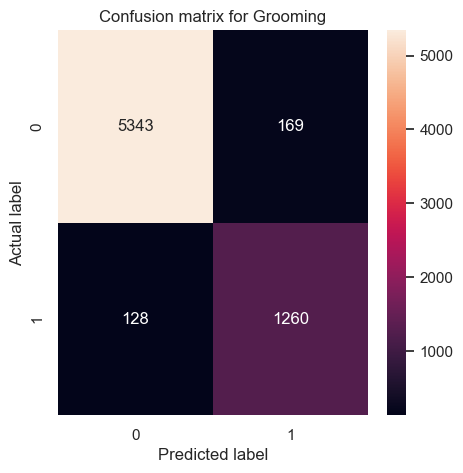

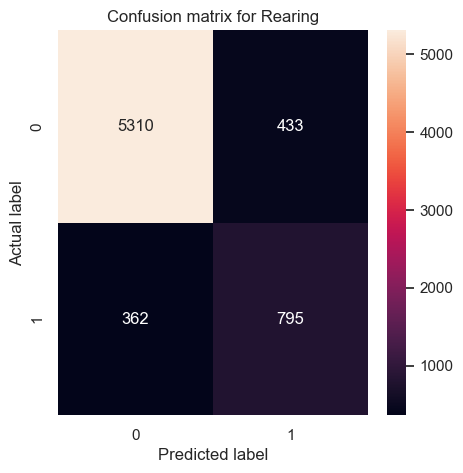

In [17]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)